In [4]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime
import pandas_datareader.data as web

from time import sleep

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF


# Macro Analysis

To Do
- Economic Quadrant
- Econmic Quadrant with Rate of Change
- M2 growth
- M2 Acceleration
- 10Y bond yield rate of change
- Include Qualtiles of all
- Present in a nice format

In [75]:
GDP_tmp = web.DataReader('GDPC1','fred', '1970-01-01') #Quaterly
CPI_tmp = web.DataReader('CPIAUCSL','fred', '1970-01-01') # Monthly
yield10_tmp = web.DataReader('DGS10','fred', '1970-01-01') # Daily
M2_tmp = web.DataReader('M2','fred', '1970-01-01') # Weekly

### Growth YoY

In [76]:
GDP_Change = GDP_tmp.pct_change(4) 
CPI_Change = CPI_tmp.pct_change(12)

In [77]:
Growth_Data = pd.concat([GDP_Change, CPI_Change],axis =1)
Growth_Data.columns = ["GDP", "CPI"]
Growth_Data = Growth_Data.dropna()

Growth_Data.index = Growth_Data.index.to_period('Q')

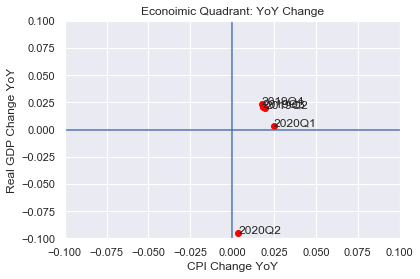

In [78]:
n=5
plt.scatter(Growth_Data["CPI"].tail(n), Growth_Data["GDP"].tail(n), color = "red")

plt.ylabel("Real GDP Change YoY")
plt.xlabel("CPI Change YoY")

plt.axhline(y=0)
plt.axvline()

plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

for i, txt in enumerate(Growth_Data["CPI"].tail(n).index):
    plt.annotate(txt, (Growth_Data["CPI"].tail(n)[i], Growth_Data["GDP"].tail(n)[i]))
    
plt.title('Econoimic Quadrant: YoY Change');

### Rate of Change YoY

In [79]:
GDP_RC = GDP_tmp.pct_change(4).pct_change(4) 
CPI_RC = CPI_tmp.pct_change(12).pct_change(12)


RC_Data = pd.concat([GDP_RC, CPI_RC],axis =1)
RC_Data.columns = ["GDP", "CPI"]
RC_Data = RC_Data.dropna()

RC_Data.index = RC_Data.index.to_period('Q')

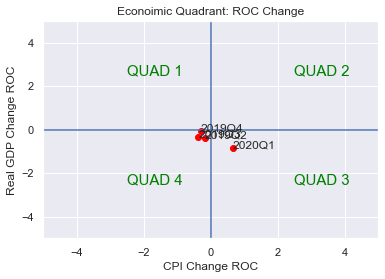

In [80]:
n=5
lim = 5
sns.set()
plt.scatter(RC_Data["CPI"].tail(n), RC_Data["GDP"].tail(n), color = "red")

plt.ylabel("Real GDP Change ROC")
plt.xlabel("CPI Change ROC")

plt.axhline(y=0)
plt.axvline()

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for i, txt in enumerate(RC_Data["CPI"].tail(n).index):
    plt.annotate(txt, (RC_Data["CPI"].tail(n)[i], RC_Data["GDP"].tail(n)[i]))

plt.text(-lim/2, lim/2, r'QUAD 1', fontsize=15, color='green')
plt.text(lim/2, lim/2, r'QUAD 2', fontsize=15, color='green')
plt.text(lim/2, -lim/2, r'QUAD 3', fontsize=15, color='green')
plt.text(-lim/2, -lim/2, r'QUAD 4', fontsize=15, color='green')
    
plt.title('Econoimic Quadrant: ROC Change');

### Data and Stats for 10 Y bond and M2

In [38]:
yield10_Change = yield10_tmp.pct_change(252)
M2_Change = M2_tmp.pct_change(52)

M2_RC = M2_Change.pct_change(52)

In [56]:
yield10_Change.tail(1)
M2_Change.tail(1)
M2_RC.tail(1)

,M2
DATE,
2020-08-10,3.475729


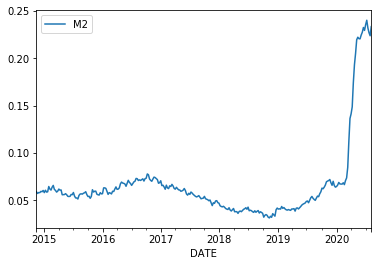

In [52]:
M2_Change.tail(300).plot()

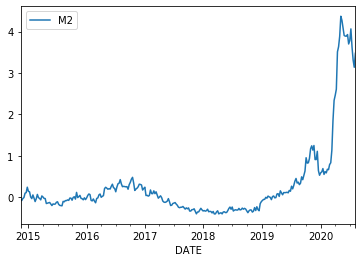

In [53]:
M2_RC.tail(300).plot()